In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Root directory of the project
#ROOT_DIR = os.path.abspath("../")
ROOT_DIR = '/home/luy1/Desktop/Mask_RCNN-master'

In [3]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

/home/luy1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/luy1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/luy1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/luy1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWa

In [4]:
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

In [5]:
# Directory to save logs and trained model
#MODEL_DIR = os.path.join(ROOT_DIR, "logs")
MODEL_DIR = '/home/luy1/Desktop/experiment-2/logs_2'

In [6]:
# Local path to trained weights file
#COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
#COCO_MODEL_PATH = '/home/luy1/Desktop/experiment-2/logs_2/part20190401T1359/mask_rcnn_part_0002.h5'
COCO_MODEL_PATH = '/home/luy1/Desktop/segmentation/logs_2/part20190402T1413/mask_rcnn_part_0002.h5'

In [7]:
# Directory of images to run detection on
#IMAGE_DIR = os.path.join(ROOT_DIR, "images")
IMAGE_DIR = '/home/luy1/Desktop/experiment-2/dataset/test'

In [8]:
sys.path.append('/home/luy1/Desktop/experiment-2')
import custom_multiclass_5

In [9]:
config = custom_multiclass_5.BalloonConfig()
#custom_DIR = os.path.join(ROOT_DIR, "customImages")

In [10]:
class InferenceConfig(config.__class__):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

In [11]:
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                18
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [12]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [13]:
# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Re-starting from epoch 2


In [14]:
class_names = ["BG", "rear_bumper", "front_bumper", "headlamp", "door", "hood"]


file_names = next(os.walk(IMAGE_DIR))[2]
file_names

['66.jpg',
 '60.jpg',
 '67.jpg',
 '28.jpg',
 '12.jpg',
 '45.jpg',
 '72.jpg',
 '11.jpg']

In [19]:
file_name = random.choice(file_names)
print(file_name)

28.jpg


In [20]:
image = skimage.io.imread(os.path.join(IMAGE_DIR, file_name))
image

array([[[184, 162, 141],
        [190, 168, 147],
        [203, 181, 160],
        ...,
        [ 72,  82,  21],
        [ 80,  91,  31],
        [ 83,  94,  36]],

       [[184, 162, 141],
        [190, 168, 147],
        [201, 179, 158],
        ...,
        [ 72,  82,  21],
        [ 81,  92,  34],
        [ 84,  95,  37]],

       [[185, 163, 142],
        [189, 167, 146],
        [198, 176, 155],
        ...,
        [ 73,  81,  22],
        [ 83,  92,  37],
        [ 86,  97,  41]],

       ...,

       [[128, 127, 132],
        [130, 129, 134],
        [135, 134, 139],
        ...,
        [ 89,  89,  89],
        [ 87,  87,  87],
        [ 85,  85,  85]],

       [[128, 127, 132],
        [131, 130, 135],
        [137, 136, 141],
        ...,
        [ 90,  90,  90],
        [ 87,  87,  87],
        [ 85,  85,  85]],

       [[128, 127, 132],
        [132, 131, 136],
        [137, 136, 141],
        ...,
        [ 91,  91,  91],
        [ 87,  87,  87],
        [ 85,  85,  85]]

In [21]:
import cv2

In [22]:
def display_results(image, boxes, masks, class_ids, class_names, scores=None,
                        show_mask=True, show_bbox=True, display_img=True,
                        save_img=True, save_dir=None, img_name=None):
        """
        boxes: [num_instance, (y1, x1, y2, x2, class_id)] in image coordinates.
        masks: [height, width, num_instances]
        class_ids: [num_instances]
        class_names: list of class names of the dataset (Without Background)
        scores: (optional) confidence scores for each box
        show_mask, show_bbox: To show masks and bounding boxes or not
        display_img: To display the image in popup
        save_img: To save the predict image
        save_dir: If save_img is True, the directory where you want to save the predict image
        img_name: If save_img is True, the name of the predict image

        """
        n_instances = boxes.shape[0]
        colors = color_map()
        for k in range(n_instances):
            color = colors[class_ids[k]].astype(np.int)
            if show_bbox:
                box = boxes[k]
                cls = class_names[class_ids[k]-1]  # Skip the Background
                score = scores[k]
                cv2.rectangle(image, (box[1], box[0]), (box[3], box[2]), color.tolist(), 1)
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(image, '{}: {:.3f}'.format(cls, score), (box[1], box[0]),
                            font, 0.4, (0, 255, 255), 1, cv2.LINE_AA)

            if show_mask:
                mask = masks[:, :, k]
                color_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.int)
                color_mask[mask] = color
                image = cv2.addWeighted(color_mask, 0.5, image.astype(np.int), 1, 0)

        if display_img:
            plt.imshow(image)
            plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
            plt.show()
        if save_img:
            cv2.imwrite(os.path.join(save_dir, img_name), image)

        return None

In [23]:
def color_map(N=256, normalized=False):
        def bitget(byteval, idx):
            return ((byteval & (1 << idx)) != 0)

        dtype = 'float32' if normalized else 'uint8'
        cmap = np.zeros((N, 3), dtype=dtype)
        for i in range(N):
            r = g = b = 0
            c = i
            for j in range(8):
                r = r | (bitget(c, 0) << 7 - j)
                g = g | (bitget(c, 1) << 7 - j)
                b = b | (bitget(c, 2) << 7 - j)
                c = c >> 3

            cmap[i] = np.array([r, g, b])

        cmap = cmap / 255 if normalized else cmap
        return cmap

In [25]:
results = model.detect([image], verbose =1)

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 18)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [26]:
r = results[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


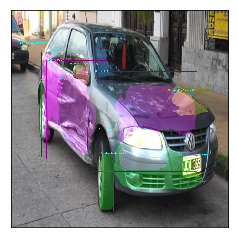

In [27]:
display_results(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'], 
                save_dir="/home/luy1/Desktop/experiment-2/dataset/infer_2", 
                img_name="inferenced.png")